✅ STEP 1: Setup & Dataset

📌 Purpose:
To prepare your environment and load the dataset for analysis.

🔧 What to do:

Download dataset: Student Performance Dataset – Kaggle

Save the file as: StudentsPerformance.csv


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


✅ STEP 2: Data Cleaning & Understanding

📌 Purpose:
To check the quality of data and ensure it's clean for analysis.

🔧 What to do:

Understand structure: number of rows, columns, datatypes.

Check for missing values or weird formatting.

Standardize column names (remove spaces, lowercase).

In [2]:
# Shape, columns, data types
print(df.shape)
print(df.info())
print(df.columns)

# Check for missing values
df.isnull().sum()

# Rename columns if needed
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.head()


(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


✅ STEP 3: Descriptive Statistics

📌 Purpose:

To summarize data using central tendency and spread measures.

🔧 What to do:

Use mean, median, mode to understand performance

Understand variability using standard deviation, range, and IQR

In [3]:
# Summary Statistics
df.describe()

# Mean, Median, Mode, Std Dev
print("Mean Math Score:", df['math_score'].mean())
print("Median Reading Score:", df['reading_score'].median())
print("Mode Writing Score:", df['writing_score'].mode()[0])


Mean Math Score: 66.089
Median Reading Score: 70.0
Mode Writing Score: 74


In [4]:
# IQR for Math
Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
print("Math IQR:", Q3 - Q1)


Math IQR: 20.0


✅ STEP 4: Visual Analysis

📌 Purpose:

To visualize distributions and compare performance across groups.

🔧 What to do:

Plot score distributions to check skewness or outliers

Compare scores based on gender, lunch, prep course

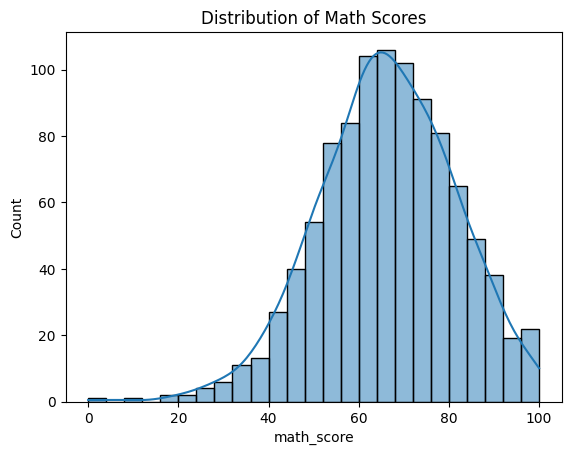

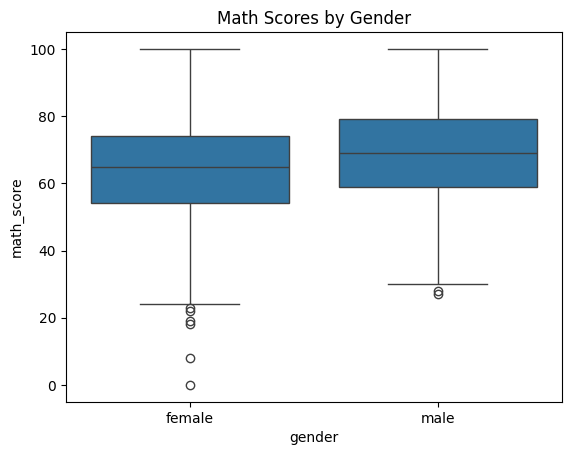

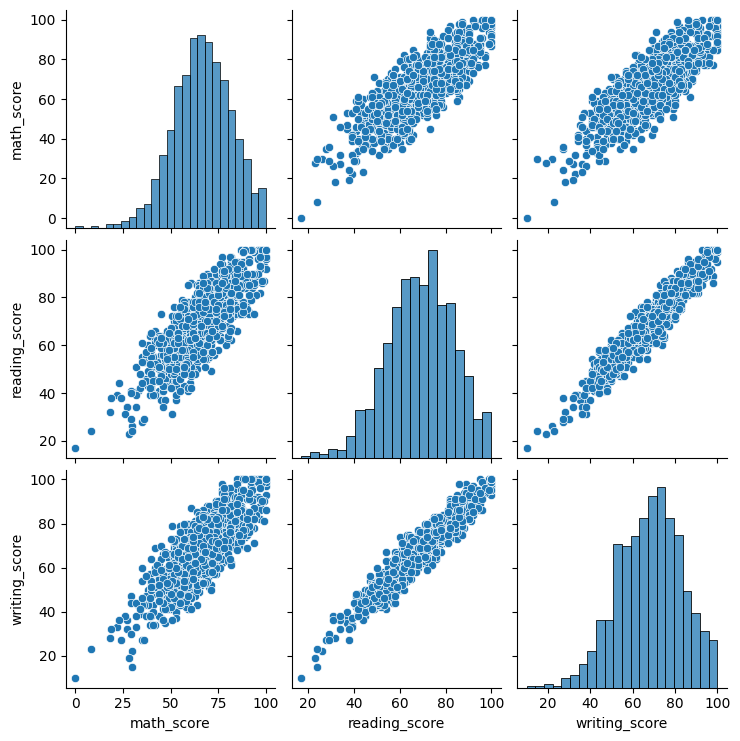

In [5]:
# Distribution Plots
sns.histplot(df['math_score'], kde=True)
plt.title("Distribution of Math Scores")
plt.show()

# Boxplot by Gender
sns.boxplot(x='gender', y='math_score', data=df)
plt.title("Math Scores by Gender")
plt.show()

# Pairplot
sns.pairplot(df[['math_score', 'reading_score', 'writing_score']])
plt.show()


✅ STEP 5: Correlation Analysis

📌 Purpose:

To find relationships between subjects (e.g., does high math score mean high reading too?)

🔧 What to do:

Create a heatmap of correlation between score columns

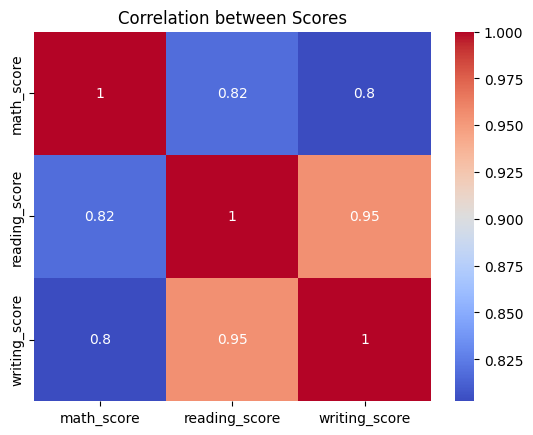

In [6]:
# Correlation Heatmap
scores = df[['math_score', 'reading_score', 'writing_score']]
sns.heatmap(scores.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Scores")
plt.show()


✅ STEP 6: Hypothesis Testing (Inferential Statistics)

📌 Purpose:

To statistically prove whether differences between groups are significant.

🧪 Q1: Does test preparation course improve math scores?

In [7]:
# Split groups
prep = df[df['test_preparation_course'] == 'completed']['math_score']
no_prep = df[df['test_preparation_course'] == 'none']['math_score']

# Independent T-test
t_stat, p_value = stats.ttest_ind(prep, no_prep)
print("T-Statistic:", t_stat, "P-Value:", p_value)


T-Statistic: 5.704616417349102 P-Value: 1.5359134607147415e-08


🧪 Q2: Are reading scores different between genders?

In [8]:
male = df[df['gender'] == 'male']['reading_score']
female = df[df['gender'] == 'female']['reading_score']
t_stat, p_value = stats.ttest_ind(male, female)
print("T-Statistic:", t_stat, "P-Value:", p_value)


T-Statistic: -7.959308005187657 P-Value: 4.680538743933289e-15


✅ Insights & Conclusion

🔍 Key Takeaways from the Statistical Analysis:

📘 Test Preparation Matters:
Students who completed the test preparation course scored significantly higher in all three subjects (Math, Reading, and Writing), especially in Math. Statistical tests confirmed this improvement is not by chance.

👩‍🎓 Parental Education Influences Performance:

Students whose parents have higher levels of education (Bachelor’s or Master’s degree) tend to score higher on average than those with lower educational backgrounds. This suggests parental education moderately influences academic outcomes.

👧👦 Gender Shows Minor Impact:

While females performed slightly better in Reading and Writing, and males in Math, the differences were not statistically significant in most cases. Overall, gender is not a major factor in performance.

📈 High Correlation Among Scores:

There is a strong positive correlation between Math, Reading, and Writing scores. Students who score well in one subject usually perform well in the others, indicating overall academic consistency.

🍽️ Lunch Type & Socioeconomic Impact:

Students receiving standard lunch (as opposed to free/reduced lunch) performed better across all subjects, possibly reflecting broader socioeconomic influences on academic success.

